In [112]:
import numpy as np
import matplotlib.pyplot as plt


In [113]:
def load_function(amplitude,period,t):
    return amplitude * (np.cos(2 * np.pi * (t+0.75*period) / period - np.pi/2) + 1) / 2

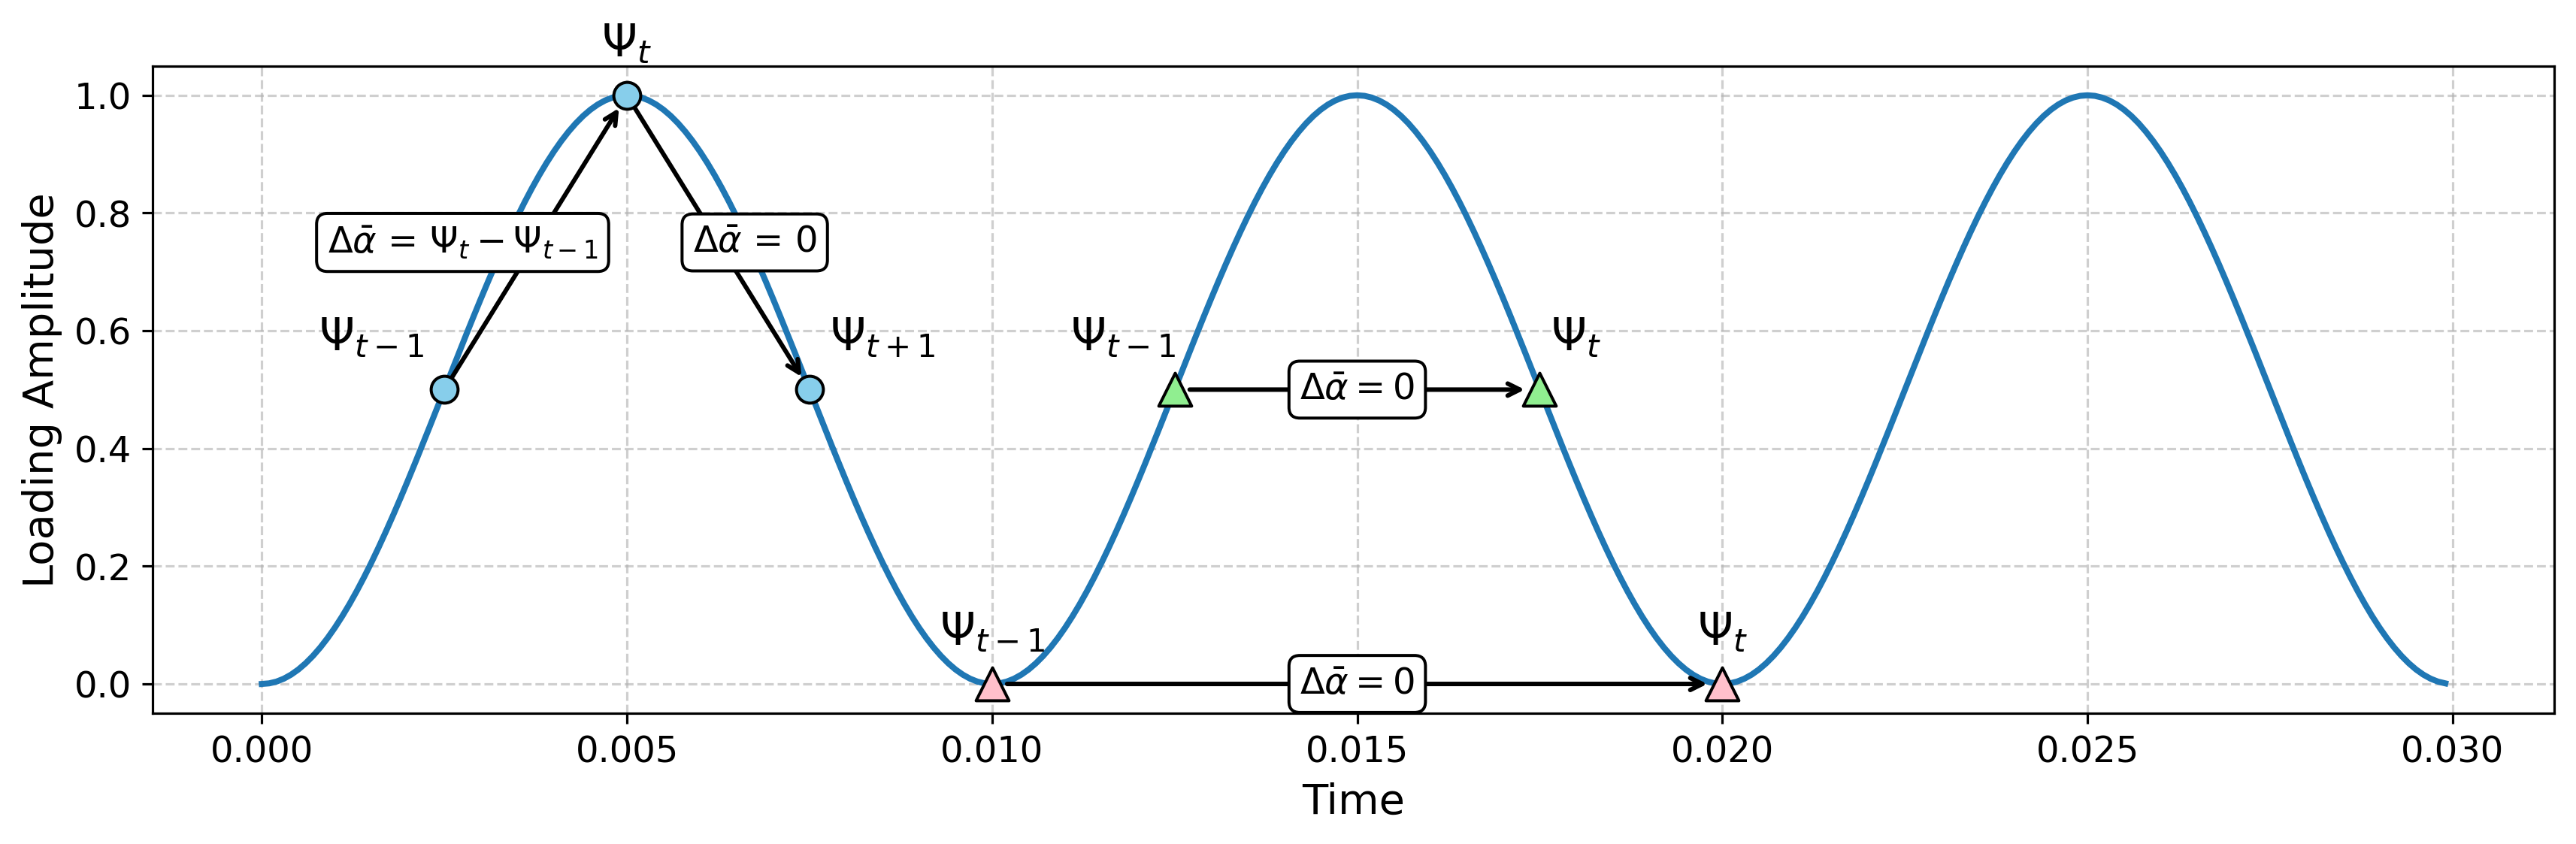

In [130]:


period = 0.01           
amplitude = 1           
num_periods = 3         
points_per_period = 100 


t = np.linspace(
    0,
    num_periods * period,
    num_periods * points_per_period,
    endpoint=False
)

load = load_function(amplitude,period,t)

fig, ax = plt.subplots(figsize=(12, 4),dpi=288)
ax.plot(t, load, linewidth=2)


t_label = np.array([0.0025, 0.005, 0.0075])
labeled = load_function(amplitude,period,t_label)
texts = [r"$\Psi_{t-1}$", r"$\Psi_{t}$",r"$\Psi_{t+1}$"]
x_ = [-0.001,0,0.001]
for idx, (x, y) in enumerate(zip(t_label, labeled), start=0):
    ax.text(
        x + x_[idx],               # x 座標
        y + 0.05,        # y + 小位移，避免文字蓋到點
        texts[idx],      # 標籤內容
        fontsize=15,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom',      # 垂直靠下對齊
    )
alplabel_pos = [-0.001,0.0005]
delta_alp = [r'$\Delta \bar\alpha$ = $\Psi_{t}-\Psi_{t-1}$', r'$\Delta \bar\alpha$ = 0']

for idx,(start, end) in enumerate(zip(t_label[:-1], t_label[1:])):
    y_start = load_function(amplitude, period, start)
    y_end   = load_function(amplitude, period, end)
    ax.annotate(
        '',
        xy=(end,   y_end),
        xytext=(start, y_start),
        arrowprops=dict(arrowstyle='->', lw=1.5, shrinkA=5, shrinkB=5)
    )
    # 計算中點
    mid_x = (start + end) / 2
    mid_y = (y_start + y_end) / 2
    # 放上 Δ \barα 標籤
    ax.text(
        mid_x+alplabel_pos[idx],
        mid_y,
        delta_alp[idx],
        fontsize=12,
        ha='center',
        va='center',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')         # 背景白        # 框線黑
    )

ax.scatter(t_label, labeled, s=80, edgecolor='k',c='skyblue', zorder=5)

# 假設 t, load_function, amplitude, period 已定義
t_label = np.array([0.01, 0.02, 0.0125, 0.0175])
labeled = load_function(amplitude, period, t_label)
texts = [r"$\Psi_{t-1}$", r"$\Psi_{t}$", r"$\Psi_{t-1}$", r"$\Psi_{t}$"]

# 分兩組
groups = [
    {"idx": [0,1], "color": "pink",      "delta": r'$\Delta \bar\alpha=0$'},
    {"idx": [2,3], "color": "lightgreen","delta": r'$\Delta \bar\alpha=0$'}
]


for gi, grp in enumerate(groups):
    ix = grp["idx"]
    ts = t_label[ix]
    ys = labeled[ix]
    # scatter 不同顏色
    ax.scatter(ts, ys, s=120, edgecolor='k', c=grp["color"], marker='^', zorder=5)
    # 文字標籤
    for j, point_idx in enumerate(ix):
        bias = [-0.0007,0.0005]
        if gi == 1:
            ax.text(
                ts[j]+bias[j], ys[j]+0.05, texts[point_idx],
                fontsize=15, ha='center', va='bottom'
            )
        else:
            ax.text(
                ts[j], ys[j]+0.05, texts[point_idx],
                fontsize=15, ha='center', va='bottom'
            )            
    # 畫箭頭
    start, end = ts
    y0, y1 = ys
    ax.annotate(
        '', xy=(end,y1), xytext=(start,y0),
        arrowprops=dict(arrowstyle='->', lw=1.5, shrinkA=5, shrinkB=5)
    )
    # 中點標 Δα
    mx, my = (start+end)/2, (y0+y1)/2
    ax.text(
        mx, my,
        grp["delta"],
        fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')
    )


ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Loading Amplitude', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [115]:
idx

1

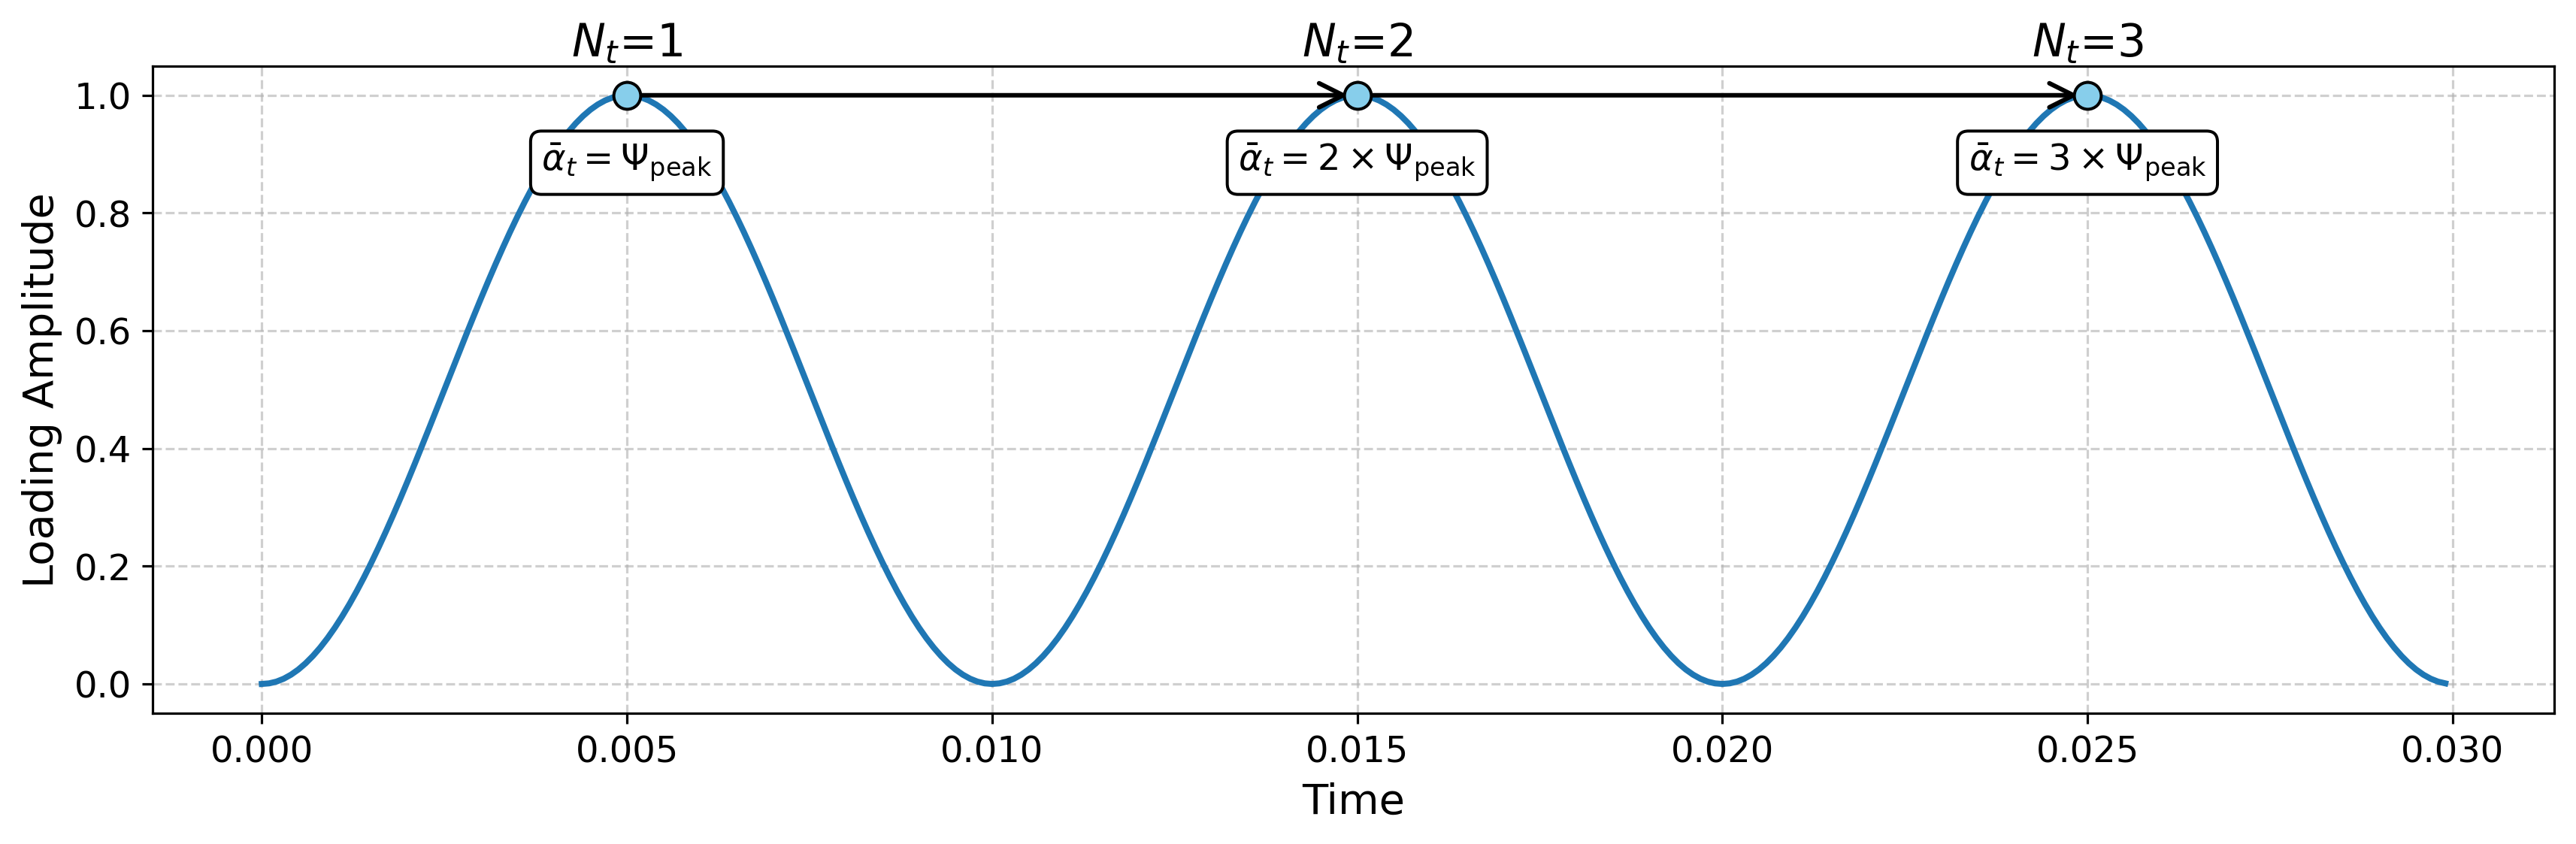

In [116]:
t_peaks = (np.arange(1, num_periods+1) - 0.5) * period

load_peaks = np.ones_like(t_peaks)

fig, ax = plt.subplots(figsize=(12, 4),dpi=288)
ax.plot(t, load, linewidth=2)
ax.scatter(t_peaks, load_peaks, s=80, edgecolor='k',c='skyblue', zorder=5)


for idx, (x, y) in enumerate(zip(t_peaks, load_peaks), start=1):
    ax.text(
        x,               # x 座標
        y + 0.05,        # y + 小位移，避免文字蓋到點
        f'$N_t$={idx}',      # 標籤內容
        fontsize=15,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom'      # 垂直靠下對齊
    )
bar_alp = [r'$\bar\alpha_t = \Psi_{\mathrm{peak}}$',
            r'$\bar\alpha_t =2 \times \Psi_{\mathrm{peak}}$',
            r'$\bar\alpha_t =3 \times \Psi_{\mathrm{peak}}$']
for idx, (x, y) in enumerate(zip(t_peaks, load_peaks), start=0):
    ax.text(
        x,               # x 座標
        y - 0.15,        # y + 小位移，避免文字蓋到點
        bar_alp[idx],      # 標籤內容
        fontsize=12,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom',     # 垂直靠下對齊
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')
    )

alplabel_pos = [0, 0]
delta_alp    = [r'$\bar\alpha_t = N \times \Psi_{\mathrm{peak}}$',
                r'$\bar\alpha_t = N \times \Psi_{\mathrm{peak}}$']

for idx, (t0, t1) in enumerate(zip(t_peaks[:-1], t_peaks[1:])):
    y0 = load_peaks[idx]
    y1 = load_peaks[idx+1]
    ax.annotate(
        '',
        xy=(t1, y1),      # 正確的箭頭終點
        xytext=(t0, y0),  # 箭頭起點
        arrowprops=dict(arrowstyle='->', lw=1.5, shrinkA=3, shrinkB=3,mutation_scale=20 )
    )
    # 中點放 Δα
    #mx, my = (t0 + t1)/2, (y0 + y1)/2
    #ax.text(
    #    mx + alplabel_pos[idx], my,
    #    delta_alp[idx],
    #    fontsize=12, ha='center', va='center',
    #    bbox=dict(boxstyle='round,pad=0.3',
    #              facecolor='white', edgecolor='black')
    #)

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Loading Amplitude', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [117]:
# 參數




def load_function_lin(amp_schedule, period, t):
    # 1) 計算每個 t 所屬週期 (0→第1週期,1→第2週期,2→第3週期)
    cycle_idx = np.floor(t/period).astype(int)
    # 避免超出範圍 (若 t 恰好到達末尾)
    cycle_idx = np.clip(cycle_idx, 0, len(amp_schedule)-1)
    # 2) 根據 schedule 取振幅
    A = amp_schedule[cycle_idx]
    # 3) 原波形公式
    return A * (np.cos(2*np.pi*(t+0.75*period)/period - np.pi/2) + 1) / 2



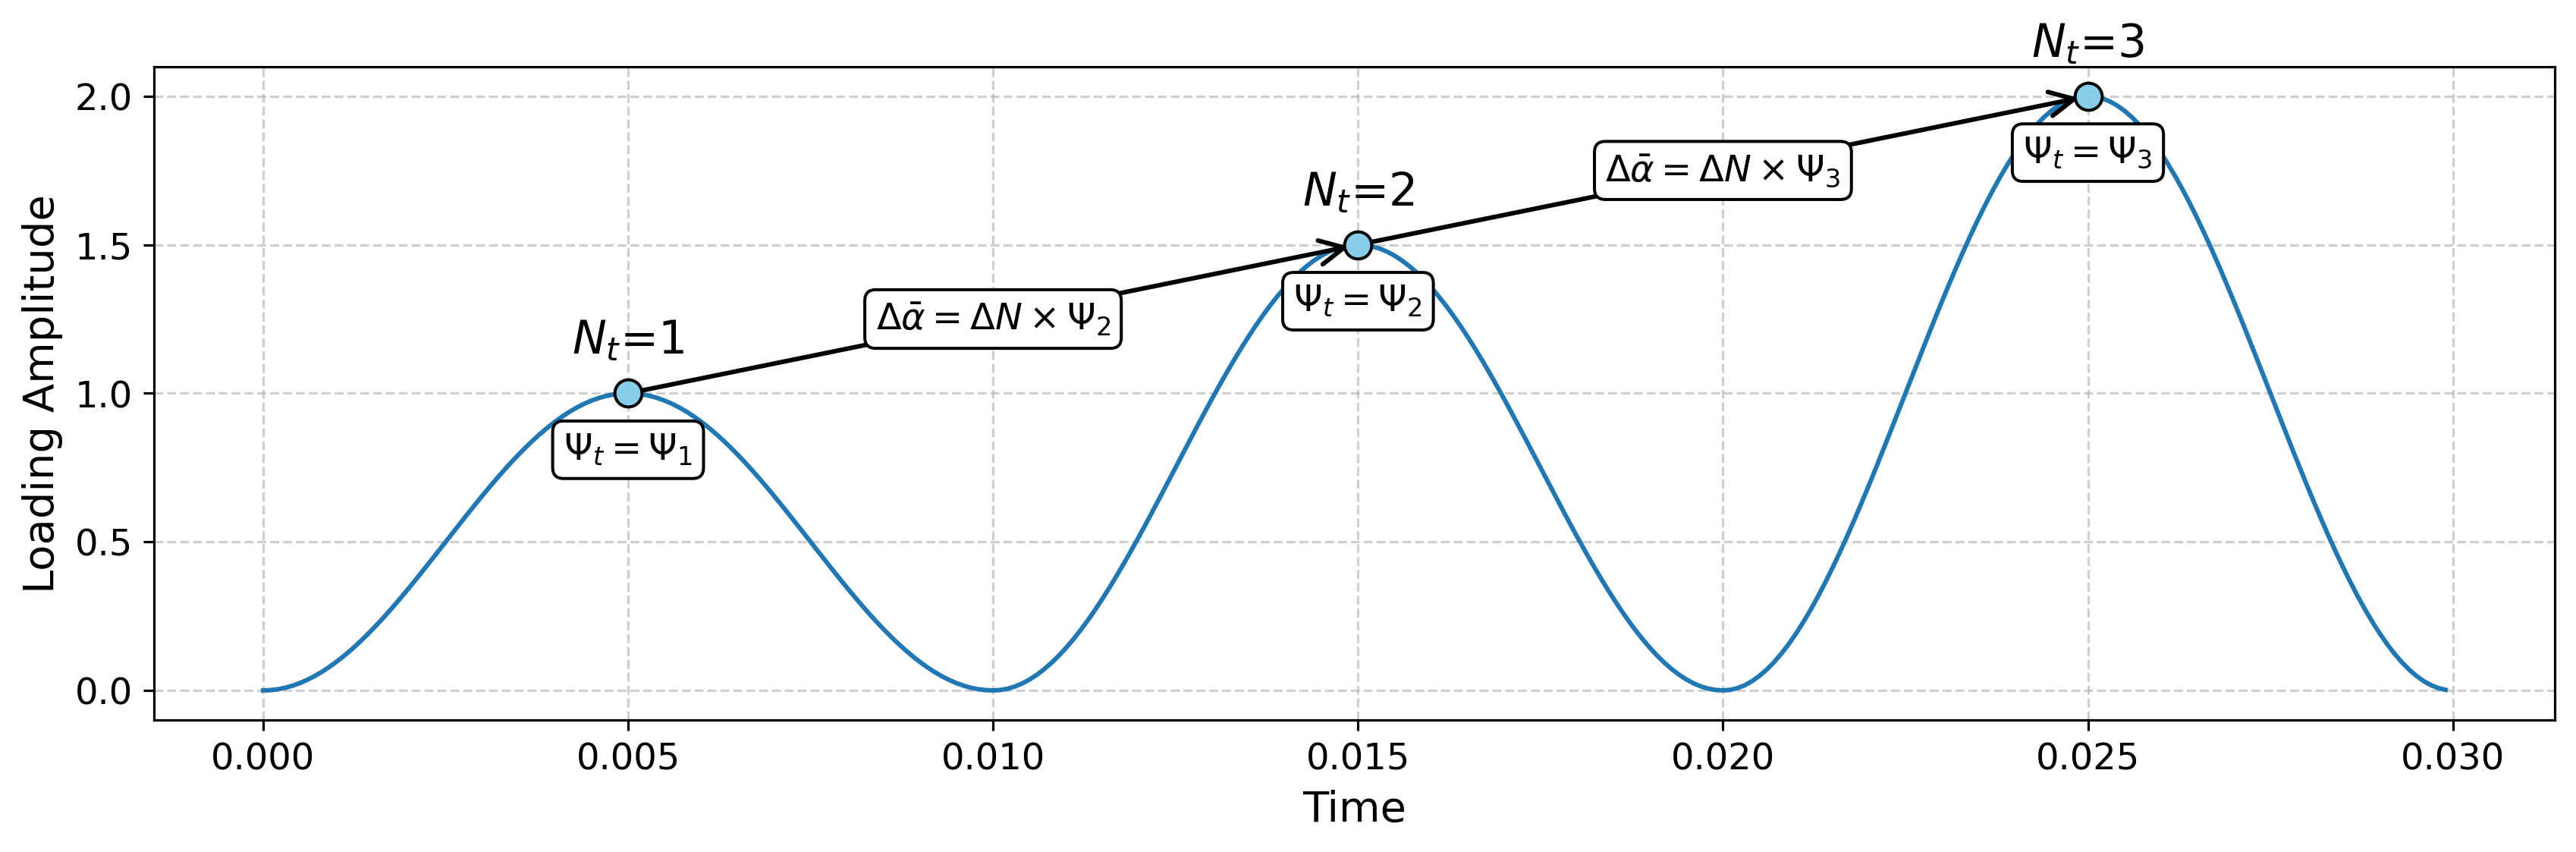

In [136]:
period = 0.01
t = np.linspace(0, 3*period, 300, endpoint=False)  # 範例時間
# 振幅表：第 1、2、3 週期對應的振幅
amp_schedule = np.array([1.0, 1.5, 2.0])
load = load_function_lin(amp_schedule, period, t)

peak_t = np.array([0.005,0.015,0.025])
peak_load = load_function_lin(amp_schedule, period, peak_t)



fig, ax = plt.subplots(figsize=(12, 4),dpi=288)
ax.plot(t, load, markevery=100)

ax.scatter(peak_t, peak_load, s=80, edgecolor='k',c='skyblue', zorder=5)

for idx, (x, y) in enumerate(zip(peak_t, peak_load), start=1):
    ax.text(
        x,               # x 座標
        y + 0.1,        # y + 小位移，避免文字蓋到點
        f'$N_t$={idx}',      # 標籤內容
        fontsize=15,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom'      # 垂直靠下對齊
    )
bar_alp = [r'$\Psi_{t}=\Psi_{1}$',
            r'$\Psi_{t}=\Psi_{2}$',
            r'$\Psi_{t}=\Psi_{3}$',]
for idx, (x, y) in enumerate(zip(peak_t, peak_load), start=0):
    ax.text(
        x,               # x 座標
        y - 0.25,        # y + 小位移，避免文字蓋到點
        bar_alp[idx],      # 標籤內容
        fontsize=12,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom',     # 垂直靠下對齊
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')
    )

alplabel_pos = [0, 0]
delta_alp    = [r'$\Delta\bar\alpha =\Delta N \times \Psi_{2}$',
                r'$\Delta\bar\alpha = \Delta N \times \Psi_{3}$']

for idx, (t0, t1) in enumerate(zip(peak_t[:-1], peak_t[1:])):
    y0 = peak_load[idx]
    y1 = peak_load[idx+1]
    ax.annotate(
        '',
        xy=(t1, y1),      # 正確的箭頭終點
        xytext=(t0, y0),  # 箭頭起點
        arrowprops=dict(arrowstyle='->', lw=1.5, shrinkA=3, shrinkB=3,mutation_scale=20 )
    )

    # 中點放 Δα
    mx, my = (t0 + t1)/2, (y0 + y1)/2
    ax.text(
        mx + alplabel_pos[idx], my,
        delta_alp[idx],
        fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')
    )
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Loading Amplitude', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

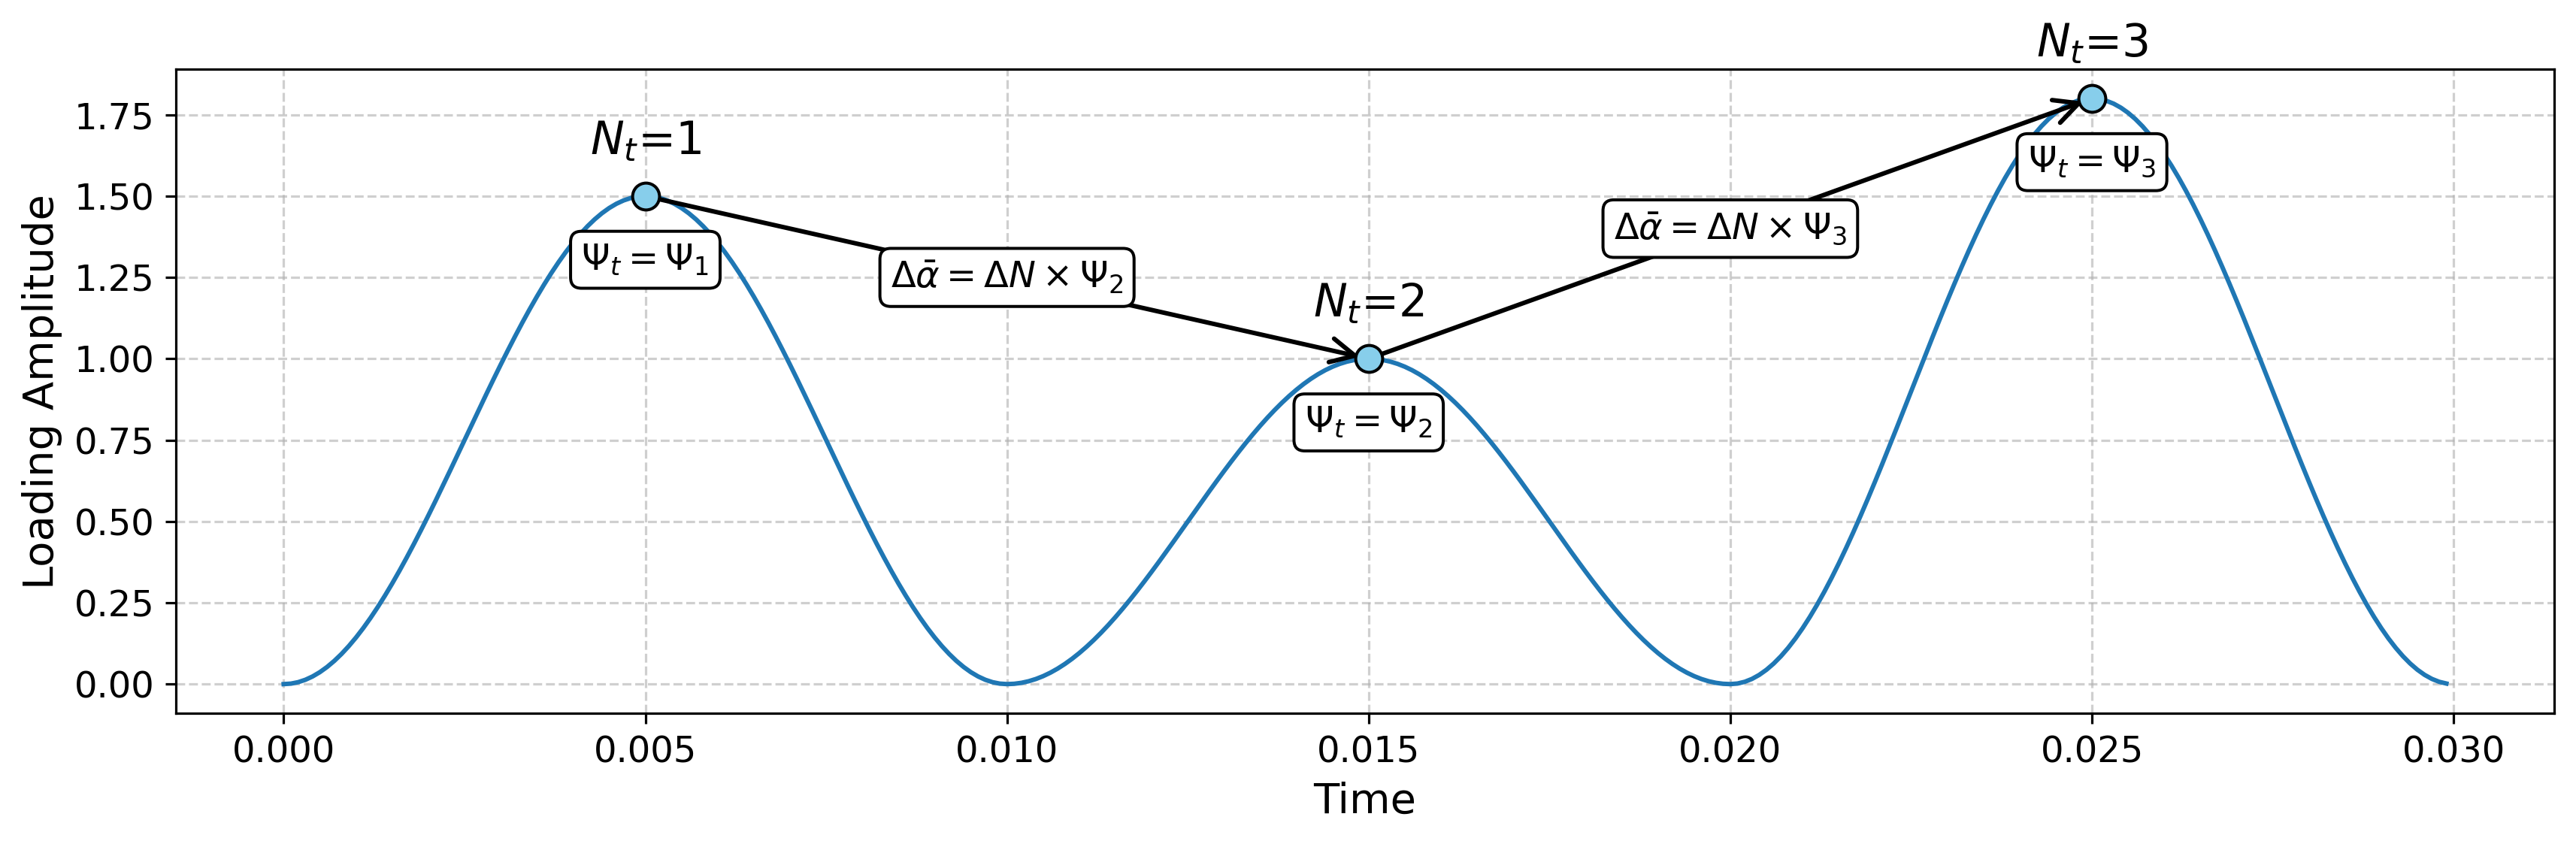

In [138]:
period = 0.01
t = np.linspace(0, 3*period, 300, endpoint=False)  # 範例時間
# 振幅表：第 1、2、3 週期對應的振幅
amp_schedule = np.array([1.5, 1.0, 1.8])
load = load_function_lin(amp_schedule, period, t)

peak_t = np.array([0.005,0.015,0.025])
peak_load = load_function_lin(amp_schedule, period, peak_t)



fig, ax = plt.subplots(figsize=(12, 4),dpi=288)
ax.plot(t, load, markevery=100)

ax.scatter(peak_t, peak_load, s=80, edgecolor='k',c='skyblue', zorder=5)

for idx, (x, y) in enumerate(zip(peak_t, peak_load), start=1):
    ax.text(
        x,               # x 座標
        y + 0.1,        # y + 小位移，避免文字蓋到點
        f'$N_t$={idx}',      # 標籤內容
        fontsize=15,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom'      # 垂直靠下對齊
    )
bar_alp = [r'$\Psi_{t}=\Psi_{1}$',
            r'$\Psi_{t}=\Psi_{2}$',
            r'$\Psi_{t}=\Psi_{3}$',]
for idx, (x, y) in enumerate(zip(peak_t, peak_load), start=0):
    ax.text(
        x,               # x 座標
        y - 0.25,        # y + 小位移，避免文字蓋到點
        bar_alp[idx],      # 標籤內容
        fontsize=12,     # 字型大小
        ha='center',     # 水平置中對齊
        va='bottom',     # 垂直靠下對齊
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')
    )

alplabel_pos = [0, 0]
delta_alp    = [r'$\Delta\bar\alpha =\Delta N \times \Psi_{2}$',
                r'$\Delta\bar\alpha = \Delta N \times \Psi_{3}$']

for idx, (t0, t1) in enumerate(zip(peak_t[:-1], peak_t[1:])):
    y0 = peak_load[idx]
    y1 = peak_load[idx+1]
    ax.annotate(
        '',
        xy=(t1, y1),      # 正確的箭頭終點
        xytext=(t0, y0),  # 箭頭起點
        arrowprops=dict(arrowstyle='->', lw=1.5, shrinkA=3, shrinkB=3,mutation_scale=20 )
    )

    # 中點放 Δα
    mx, my = (t0 + t1)/2, (y0 + y1)/2
    ax.text(
        mx + alplabel_pos[idx], my,
        delta_alp[idx],
        fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white', edgecolor='black')
    )
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Loading Amplitude', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()